# **INTRODUCTION**


TEAM MEMBERS
*   Mr. Lôc
* Mr. Tuấn
*   Mr. Nam



TARGET AUDIENCES


*   Thầy Nhân và Lớp ML30
*   Những người mê bóng đá muốn xem lại các thống kê, finding dữ liệu cũ
* Những người muốn sử dụng dữ liệu để dự đoán kết quả World Cup



ABOUT DATA

Dataset gồm dữ liệu world cup từ năm 1930 (trước chiến tranh thế giới thứ 2) tới năm 2014. Dữ liệu được chia làm 3 files

*   Dữ liệu về các trận đấu: tổ chức ở đâu, ai đấu với ai, thuộc vòng nào kết quả ra sao...
*   Dữ liệu về tổng thể kỳ world cup: tổ chức ở đâu, ai vô địch, hạng 2,3,4
* Dữ liệu về các cầu thủ



# **QUESTION FOR ANALYTICS**

I- Attendance:

 1- by years?

 2- by stages?

 3- by teams?


II- Goals: 
1. by teams? 
Đội nào ghi bàn nhiều nhất qua các kỳ wold cup
Đội nào ít lủng lưới nhất
Tấn công hay phòng thủ là chiến thuật tốt nhất trong wold cup ?


2. by year + team?

3. by stages? (mean)


III- Results:

 1- Which team win the most?

 2- Thành tích đối đầu?

 3- Which team joined extra time? how many times?

 4- Tỉ lệ thắng normal condition thế nào? Tỉ lệ thắng extra time thế nào?


 Đội chủ nhà thường thắng bao nhiêu trận? So với những mùa ko phải chủ nhà.
 Vô địch mùa trước có vô địch mùa sau ko? so sánh thành tích 2 mùa

# **INSTALL & IMPORT LIBRARY & DATA**

In [ ]:
# Create kaggle.json file
!touch kaggle.json
!echo '{"username":"lochu19886","key":"d3024a601176a125e6e49b13cfbed754"}' > kaggle.json

In [ ]:
! pip install kaggle                # Install the Kaggle library
! mkdir ~/.kaggle                   # Make a directory named “.kaggle”
! cp kaggle.json ~/.kaggle/         # Copy the “kaggle.json” into this new directory
! chmod 600 ~/.kaggle/kaggle.json   # Allocate the required permission for this file.

In [ ]:
# download dataset from Kaggle to Google Colab
! kaggle datasets download abecklas/fifa-world-cup

  0% 0.00/349k [00:00<?, ?B/s]
100% 349k/349k [00:00<00:00, 53.4MB/s]


In [ ]:
# unzip the dataset
! unzip fifa-world-cup.zip

Archive:  fifa-world-cup.zip
  inflating: WorldCupMatches.csv     
  inflating: WorldCupPlayers.csv     
  inflating: WorldCups.csv           


In [ ]:
import numpy as np                # linear algebra
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   # styling tool
import seaborn as sns             # visualization tool

pd.set_option('float_format', '{:.2f}'.format)  # Show float data in two decimal number


In [ ]:
# To export files to google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dùng Nếu Chạy Kaggle Để Load Vào OK
Matches = pd.read_csv('WorldCupMatches.csv',encoding = 'utf-8')
Players = pd.read_csv('WorldCupPlayers.csv')
WorldCups = pd.read_csv('WorldCups.csv')

# **OVERVIEW**

In [ ]:
# check Exploratory Data Analysis
def basic_eda(df):
    print("----------INFO-----------------")
    print(df.info())
    print("   ")
    print("----------Describe-------------")
    print(df.describe())
    print("   ")
    print("----------Data Types-----------")
    print(df.dtypes)
    print("   ")
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("   ")

In [ ]:
basic_eda(Matches)

----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    ob

# **DATA CLEANING**

## WORKING WITH MISSING VALUE

In [ ]:
# There are 852 non-null values which unfortunately match with index from 0 to 851
Matches[Matches['MatchID'].isnull()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
852,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
853,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
854,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
855,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
856,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
4568,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
4569,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN
4570,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,NaN


Drop column "Position" and "Event" of **Players** dataframe

Drop all rows has null value of **Matches** dataframe which is from index 852. Fill null value of column "Attendance" by mean.

In [ ]:
Matches = Matches.iloc[0:852]

In [ ]:
Matches['Attendance'] = Matches[['Attendance']].fillna(Matches['Attendance'].mean())

In [ ]:
Players = Players.drop(columns=['Position','Event'])

## WORKING WITH MISLABLED DATA

In [ ]:
Matches['Datetime'] = pd.to_datetime(Matches['Datetime'])

In [ ]:
cols = ['Year', 'Home Team Goals', 'Away Team Goals', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals']

for col in cols:
  Matches[col] = Matches[col].astype(int)

Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  852 non-null    int64         
 1   Datetime              852 non-null    datetime64[ns]
 2   Stage                 852 non-null    object        
 3   Stadium               852 non-null    object        
 4   City                  852 non-null    object        
 5   Home Team Name        852 non-null    object        
 6   Home Team Goals       852 non-null    int64         
 7   Away Team Goals       852 non-null    int64         
 8   Away Team Name        852 non-null    object        
 9   Win conditions        852 non-null    object        
 10  Attendance            852 non-null    int64         
 11  Half-time Home Goals  852 non-null    int64         
 12  Half-time Away Goals  852 non-null    int64         
 13  Referee             

In [ ]:
WorldCups['Attendance'] = WorldCups['Attendance'].str.replace('.','').astype(int)

### Xử Lý Khoảng Trống Thừa

In [ ]:
# There is a few data has redundant space

Matches[Matches['Win conditions'] == 'Italy win after extra time ']

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
34,1934,1934-06-10 17:30:00,Final,Nazionale PNF,Rome,Italy,2,1,Czechoslovakia,Italy win after extra time,55000,0,0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490.00,1134.00,ITA,TCH
39,1938,1938-06-05 17:00:00,First round,Stade V�lodrome,Marseilles,Italy,2,1,Norway,Italy win after extra time,19000,0,0,BERANEK Alois (AUT),BOUTOURE D. (FRA),TREHOU D. (FRA),206.00,1179.00,ITA,NOR
229,1970,1970-06-17 16:00:00,Semi-finals,Estadio Azteca,Mexico City,Italy,4,3,Germany FR,Italy win after extra time,102444,0,0,YAMASAKI MALDONADO Arturo (MEX),HORMAZABAL DIAZ Rafael (CHI),VELASQUEZ Guillermo (COL),569.00,1838.00,ITA,FRG
506,1994,1994-07-05 13:00:00,Round of 16,Foxboro Stadium,Boston,Nigeria,1,2,Italy,Italy win after extra time,54367,0,0,BRIZIO CARTER Arturo (MEX),TAIBI Ernesto (ARG),ZARATE Venancio (PAR),338.00,3091.00,NGA,ITA
704,2006,2006-07-04 21:00:00,Semi-finals,"FIFA World Cup Stadium, Dortmund",Dortmund,Germany,0,2,Italy,Italy win after extra time,65000,0,0,ARCHUNDIA Benito (MEX),RAMIREZ Jose (MEX),VERGARA Hector (CAN),97410400.00,97410061.00,GER,ITA


In [ ]:
# remove redundant space in data value

Matches = Matches.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
Matches[Matches['Win conditions'] == 'Italy win after extra time']

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
34,1934,1934-06-10 17:30:00,Final,Nazionale PNF,Rome,Italy,2,1,Czechoslovakia,Italy win after extra time,55000,0,0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490.00,1134.00,ITA,TCH
39,1938,1938-06-05 17:00:00,First round,Stade V�lodrome,Marseilles,Italy,2,1,Norway,Italy win after extra time,19000,0,0,BERANEK Alois (AUT),BOUTOURE D. (FRA),TREHOU D. (FRA),206.00,1179.00,ITA,NOR
229,1970,1970-06-17 16:00:00,Semi-finals,Estadio Azteca,Mexico City,Italy,4,3,Germany FR,Italy win after extra time,102444,0,0,YAMASAKI MALDONADO Arturo (MEX),HORMAZABAL DIAZ Rafael (CHI),VELASQUEZ Guillermo (COL),569.00,1838.00,ITA,FRG
506,1994,1994-07-05 13:00:00,Round of 16,Foxboro Stadium,Boston,Nigeria,1,2,Italy,Italy win after extra time,54367,0,0,BRIZIO CARTER Arturo (MEX),TAIBI Ernesto (ARG),ZARATE Venancio (PAR),338.00,3091.00,NGA,ITA
704,2006,2006-07-04 21:00:00,Semi-finals,"FIFA World Cup Stadium, Dortmund",Dortmund,Germany,0,2,Italy,Italy win after extra time,65000,0,0,ARCHUNDIA Benito (MEX),RAMIREZ Jose (MEX),VERGARA Hector (CAN),97410400.00,97410061.00,GER,ITA


### Xử Lý Stage

In [ ]:
Matches['Stage'].unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semi-finals', 'Final',
       'Preliminary round', 'Quarter-finals', 'Match for third place',
       'First round', 'Group 6', 'Group B', 'Group A', 'Group 5',
       'Group C', 'Group D', 'Group F', 'Group E', 'Round of 16',
       'Group H', 'Group G', 'Third place', 'Play-off for third place'],
      dtype=object)

In [ ]:
# WorldCups 1950: 13 in the Group round -> 4 team Final Group round. The Champions is the highest point team in the Final Group round
def fix_1950(x):
    if x in ['Group 1', 'Group 2', 'Group 3', 'Group 4']:
      return 'Group'
    else:
      return 'Group Final'
  
# WorldCups 1974-1978: First Group Round -> Second Group Round -> Final
def fix_7478(x):
    if x in ['Group 2', 'Group 1', 'Group 3', 'Group 4']:
      return 'Group'
    elif x in ['Group B', 'Group A']:
      return 'Second Group'
    elif x in['Match for third place']:
      return 'Third place'
    else:
      return x

def fix_all(x):
    if x in ['Group 1', 'Group 4', 'Group 2', 'Group 3','Group 6', 'Group B', 'Group A', 'Group 5', 'Group C', 'Group D', 'Group F', 'Group E', 'Group H', 'Group G']:
      return 'Group'
    elif x in ['Preliminary round','First round']:
      return 'Round of 16'
    elif x in ['Play-off for third place', 'Match for third place']:
      return 'Third place'
    else:
      return x

In [ ]:
Matches.loc[Matches['Year'] == 1950, 'Stage'] = Matches.loc[Matches['Year'] == 1950, 'Stage'].apply(fix_1950)
Matches.loc[((Matches['Year']  > 1973) & (Matches['Year'] < 1979)), 'Stage'] = Matches.loc[((Matches['Year'] > 1973) & (Matches['Year'] < 1979)), 'Stage'].apply(fix_7478)
Matches.loc[((Matches['Year'] != 1974) & (Matches['Year'] != 1978) & (Matches['Year'] != 1950)), 'Stage'] = Matches.loc[((Matches['Year'] != 1974) & (Matches['Year'] != 1978) & (Matches['Year'] != 1950)), 'Stage'].apply(fix_all)

### Xử Lý Home/Away Team Name

In [ ]:
Matches['Home Team Name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

In [ ]:
# Remove special characters in Name: rn"> (hardcode)
Matches = Matches.replace("C�te d'Ivoire","Côte d'Ivoire")
Matches = Matches.replace('rn">Republic of Ireland','Republic of Ireland')
Matches = Matches.replace('rn">United Arab Emirates','United Arab Emirates')
Matches = Matches.replace('rn">Trinidad and Tobago','Trinidad and Tobago')
Matches = Matches.replace('rn">Serbia and Montenegro','Serbia and Montenegro')
Matches = Matches.replace('rn">Bosnia and Herzegovina','Bosnia and Herzegovina')

### Xử Lý Đổi Tên Germany FR thành Germany

In [ ]:
check_german = Matches[Matches['Home Team Name'].isin(['Germany', 'Germany FR', 'German DR']) | Matches['Away Team Name'].isin(['Germany', 'Germany FR', 'German DR'])]

In [ ]:
Matches[Matches['Home Team Name'].isin(['Germany', 'Germany FR', 'German DR']) & Matches['Away Team Name'].isin(['Germany', 'Germany FR', 'German DR'])]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
251,1974,1974-06-22 19:30:00,Group,Volksparkstadion,Hamburg,German DR,1,0,Germany FR,,60200,0,0,BARRETO RUIZ Ramon (URU),MARQUES Armando (BRA),PESTARINO Luis (ARG),262.00,2062.00,GDR,FRG


In [ ]:
check_german['Home Team Name'].value_counts().head()

Germany FR    43
Germany       34
Argentina      4
France         4
German DR      3
Name: Home Team Name, dtype: int64

In [ ]:
check_german['Away Team Name'].value_counts().head(10)

Germany FR    19
Germany       14
Argentina      5
England        4
Spain          4
Yugoslavia     4
German DR      3
Chile          3
Sweden         3
Mexico         3
Name: Away Team Name, dtype: int64

In [ ]:
check_german[(check_german['Home Team Name'] == 'German DR') | (check_german['Away Team Name'] == 'German DR')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
234,1974,1974-06-14 19:30:00,Group,Volksparkstadion,Hamburg,German DR,2,0,Australia,,17000,0,0,NDIAYE Youssou (SEN),SANCHEZ IBANEZ Pablo (ESP),DELGADO Omar (COL),262.00,1955.00,GDR,AUS
242,1974,1974-06-18 19:30:00,Group,Olympiastadion,Berlin West,Chile,1,1,German DR,,28300,0,0,ANGONESE Aurelio (ITA),SCHEURER Ruedi (SUI),DAVIDSON Bob (SCO),262.00,2004.00,CHI,GDR
251,1974,1974-06-22 19:30:00,Group,Volksparkstadion,Hamburg,German DR,1,0,Germany FR,,60200,0,0,BARRETO RUIZ Ramon (URU),MARQUES Armando (BRA),PESTARINO Luis (ARG),262.00,2062.00,GDR,FRG
257,1974,1974-06-26 19:30:00,Second Group,Niedersachsenstadion,Hanover,Brazil,1,0,German DR,,59863,0,0,THOMAS Clive (WAL),BABACAN Dogan (TUR),BOSKOVIC Tony (AUS),263.00,1982.00,BRA,GDR
262,1974,1974-06-30 16:00:00,Second Group,Parkstadion,Gelsenkirchen,German DR,0,2,Netherlands,,68348,0,1,SCHEURER Ruedi (SUI),LINEMAYR Erich (AUT),DELGADO Omar (COL),263.00,2067.00,GDR,NED
266,1974,1974-07-03 19:30:00,Second Group,Parkstadion,Gelsenkirchen,Argentina,1,1,German DR,,54254,1,1,TAYLOR John (ENG),KAMEL Mahmoud (EGY),THOMAS Clive (WAL),263.00,1946.00,ARG,GDR


In [ ]:
Matches['Home Team Name'] = Matches['Home Team Name'].replace('Germany FR', 'Germany')
Matches['Away Team Name'] = Matches['Away Team Name'].replace('Germany FR', 'Germany')
WC = WorldCups.replace('Germany FR', 'Germany')

## PROCESSING DUPLICATED DATA
MatchID is chosen to differentiate duplicated data

In [ ]:
Matches['MatchID'].duplicated().sum()

0

In [ ]:
Matches = Matches[~Matches['MatchID'].duplicated()]

In [ ]:
Matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,1930-07-13 15:00:00,Group,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.00,1096.00,FRA,MEX
1,1930,1930-07-13 15:00:00,Group,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.00,1090.00,USA,BEL
2,1930,1930-07-14 12:45:00,Group,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.00,1093.00,YUG,BRA
3,1930,1930-07-14 14:50:00,Group,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.00,1098.00,ROU,PER
4,1930,1930-07-15 16:00:00,Group,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.00,1085.00,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014,2014-07-05 13:00:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,68551,1,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.00,300186504.00,ARG,BEL
832,2014,2014-06-29 13:00:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,,58817,0,0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.00,300186508.00,NED,MEX
833,2014,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.00,300186459.00,CRC,GRE
834,2014,2014-07-01 13:00:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1,0,Switzerland,Argentina win after extra time,63255,0,0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.00,300186503.00,ARG,SUI


## REMOVE UNWANTED DATA

In [ ]:
Matches = Matches.drop(columns=['Datetime', 'Referee', 'Assistant 1', 'Assistant 2','RoundID'])

In [ ]:
Matches

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,MatchID,Home Team Initials,Away Team Initials
0,1930,Group,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,1096.00,FRA,MEX
1,1930,Group,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,1090.00,USA,BEL
2,1930,Group,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,1093.00,YUG,BRA
3,1930,Group,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,1098.00,ROU,PER
4,1930,Group,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,1085.00,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,68551,1,0,300186504.00,ARG,BEL
832,2014,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,,58817,0,0,300186508.00,NED,MEX
833,2014,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242,0,0,300186459.00,CRC,GRE
834,2014,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1,0,Switzerland,Argentina win after extra time,63255,0,0,300186503.00,ARG,SUI


#**EXPLORATORY DATA ANALYSIS**

## LOC DATA

### prepare data

In [ ]:
MCA = Matches.drop(columns=['Stadium', 'City', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'MatchID', ])

In [ ]:
WC.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [ ]:
MCA.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Initials,Away Team Initials
0,1930,Group,France,4,1,Mexico,FRA,MEX
1,1930,Group,USA,3,0,Belgium,USA,BEL
2,1930,Group,Yugoslavia,2,1,Brazil,YUG,BRA
3,1930,Group,Romania,3,1,Peru,ROU,PER
4,1930,Group,Argentina,1,0,France,ARG,FRA


In [ ]:
# Merge 2 above dataframe

WM = pd.merge(MCA, WC[['Year', 'Country', 'Winner', 'Runners-Up']], how='left', on='Year')
WM.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Home Team Initials,Away Team Initials,Country,Winner,Runners-Up
0,1930,Group,France,4,1,Mexico,,FRA,MEX,Uruguay,Uruguay,Argentina
1,1930,Group,USA,3,0,Belgium,,USA,BEL,Uruguay,Uruguay,Argentina
2,1930,Group,Yugoslavia,2,1,Brazil,,YUG,BRA,Uruguay,Uruguay,Argentina
3,1930,Group,Romania,3,1,Peru,,ROU,PER,Uruguay,Uruguay,Argentina
4,1930,Group,Argentina,1,0,France,,ARG,FRA,Uruguay,Uruguay,Argentina


### qualified teams

In [ ]:
# Function to count the qualified teams by years

def to_count(column_name):
  df = pd.DataFrame(MCA.groupby('Year')[column_name].value_counts())
  df = df.rename(columns={column_name:'Count'})
  df = df.reset_index()
  df = df.rename(columns={column_name:'Team'})
  return df

In [ ]:
# Execute to select qualified teams on both Home and Away

away_count = to_count('Away Team Name')
home_count = to_count('Home Team Name')

In [ ]:
# Concat 2 above dataframes

qualified_teams = pd.concat([away_count, home_count], axis=0)
qualified_teams = qualified_teams.drop(columns =['Count'])

qualified_teams = qualified_teams[~(qualified_teams.duplicated())] # Drop duplicated rows

In [ ]:
# Final qualified teams count dataframe

team_count = qualified_teams.groupby('Team').count()[['Year']].sort_values('Year',ascending=False).reset_index()
team_count = team_count.rename(columns={'Year':'Frequency', 'Team':'Away Team Name'}) # We have to change the Team column name as we use it to merge with the first data to get the initial names
team_count

,Away Team Name,Frequency
0,Brazil,20
1,Germany,18
2,Italy,18
3,Argentina,16
4,Mexico,15
...,...,...
77,Iraq,1
78,Kuwait,1
79,Haiti,1
80,Dutch East Indies,1


In [ ]:
# Final qualified teams count dataframe with initial names

qm = pd.read_csv('WorldCupMatches.csv',encoding = 'utf-8')
team_merge = pd.merge(team_count, qm[['Away Team Name', 'Away Team Initials']], how='left', on='Away Team Name')

team_merge = team_merge[~(team_merge.duplicated())] # Drop duplicated rows

In [ ]:
team_merge

,Away Team Name,Frequency,Away Team Initials
0,Brazil,20,BRA
26,Germany,18,GER
40,Italy,18,ITA
66,Argentina,16,ARG
93,Mexico,15,MEX
...,...,...,...
809,Iraq,1,IRQ
810,Kuwait,1,KUW
813,Haiti,1,HAI
815,Dutch East Indies,1,INH


In [ ]:
# Export file to google drive

team_merge.to_csv("qualified_teams.csv")
!cp qualified_teams.csv "/content/drive/MyDrive/Data_to_analyze/Fifa_WorldCups"

### explore top WC champions

In [ ]:
champions = pd.DataFrame(WC['Winner'].value_counts())
champions = champions.rename(columns={'Winner': 'Winning'})

In [ ]:
# This is how we get the total appearance of 1 team in final round
WM[(WM['Stage'] == 'Final') & ((WM['Home Team Name'] == 'Brazil')|(WM['Away Team Name'] == 'Brazil'))]['Stage'].count()

6

In [ ]:
# Create a dictitionary of final round appearance count

champ_list = champions.index.tolist()

champ_dict ={}

for c in champ_list:
  finale_count = WM[(WM['Stage'] == 'Final') & ((WM['Home Team Name'] == c)|(WM['Away Team Name'] == c))]['Stage'].count()
  champ_dict[c] = finale_count

champ_dict

{'Argentina': 5,
 'Brazil': 6,
 'England': 1,
 'France': 2,
 'Germany': 8,
 'Italy': 6,
 'Spain': 1,
 'Uruguay': 1}

In [ ]:
# Turn the dictionary of final round appearance count into dataframe

champ_df = pd.DataFrame(index=champ_dict.keys(),
                           data=champ_dict.values(),
                           columns=['Finale Appearance'])

champ_df

,Finale Appearance
Brazil,6
Germany,8
Italy,6
Argentina,5
Uruguay,1
England,1
Spain,1
France,2


In [ ]:
winners = pd.merge(champions, champ_df, left_index=True, right_index=True)

In [ ]:
winners.style\
              .background_gradient(cmap="Greens", subset=['Winning'])\
              .background_gradient(cmap="Blues", subset=['Finale Appearance'])

,Winning,Finale Appearance
Brazil,5,6
Germany,4,8
Italy,4,6
Argentina,2,5
Uruguay,2,1
England,1,1
Spain,1,1
France,1,2


In [ ]:
# Export file to google drive

winners.to_csv("winners.csv")
!cp winners.csv "/content/drive/MyDrive/Data_to_analyze/Fifa_WorldCups"

### explore Runners-Up

In [ ]:
runners = pd.DataFrame(WC['Runners-Up'].value_counts())

In [ ]:
runners.style.background_gradient(cmap='Oranges')

,Runners-Up
Germany,4
Netherlands,3
Argentina,3
Czechoslovakia,2
Italy,2
Hungary,2
Brazil,2
Sweden,1
France,1


In [ ]:
# Export file to google drive

runners.to_csv("runners_up.csv")
!cp runners_up.csv "/content/drive/MyDrive/Data_to_analyze/Fifa_WorldCups"

### whether the host is the champion

In [ ]:
WC[WC['Winner'] == WC['Country']]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1545791
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100


In [ ]:
WC[(WC['Winner'] == WC['Country']) | (WC['Runners-Up'] == WC['Country'])]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1545791
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100


20 WorldCups -> There were 8 Hosts made themselves to the Final and 6 of them are Winners

### Win conditions

In [ ]:
# All final round matches that won by extra time

final_extra = WM[(WM['Stage'] == 'Final') & ~(WM['Win conditions'] == '')]
final_extra

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Home Team Initials,Away Team Initials,Country,Winner,Runners-Up
34,1934,Final,Italy,2,1,Czechoslovakia,Italy win after extra time,ITA,TCH,Italy,Italy,Czechoslovakia
199,1966,Final,England,4,2,Germany,England win after extra time,ENG,FRG,England,England,Germany
307,1978,Final,Argentina,3,1,Netherlands,Argentina win after extra time,ARG,NED,Argentina,Argentina,Netherlands
515,1994,Final,Brazil,0,0,Italy,Brazil win on penalties (3 - 2),BRA,ITA,USA,Brazil,Italy
707,2006,Final,Italy,1,1,France,Italy win on penalties (5 - 3),ITA,FRA,Germany,Italy,France
771,2010,Final,Netherlands,0,1,Spain,Spain win after extra time,NED,ESP,South Africa,Spain,Netherlands
828,2014,Final,Germany,1,0,Argentina,Germany win after extra time,GER,ARG,Brazil,Germany,Argentina


In [ ]:
# Total count of extra time played at final round by winners

final_extra_winners = pd.DataFrame(final_extra['Winner'].value_counts())
final_extra_winners = final_extra_winners.rename(columns={'Winner':'Winning'})
final_extra_winners

,Winning
Italy,2
Argentina,1
Germany,1
England,1
Brazil,1
Spain,1


In [ ]:
# example of getting total time win the Cup by extra time of a team
WM[(WM['Stage'] == 'Final') & ~(WM['Win conditions'] == '') & (WM['Winner'] == 'Italy')]['Home Team Name'].count()

2

In [ ]:
# Create a dictionary of the frequency of all teams played the final round with extra time

winner_list = final_extra['Winner'].unique().tolist() #get the list of all winner by extra time
final_extra_dict ={}

for c in winner_list:
  extra_count = WM[(WM['Stage'] == 'Final') & ~(WM['Win conditions'] == '') & ((WM['Winner'] == c)|(WM['Runners-Up'] == c))]['Home Team Name'].count()
  final_extra_dict[c] = extra_count

final_extra_dict

{'Argentina': 2,
 'Brazil': 1,
 'England': 1,
 'Germany': 2,
 'Italy': 3,
 'Spain': 1}

In [ ]:
# Turn the dictionary into dataframe

final_extra_df = pd.DataFrame(index=final_extra_dict.keys(),
                           data=final_extra_dict.values(),
                           columns=['Extratime Match'])

final_extra_df

,Extratime Match
Italy,3
England,1
Argentina,2
Brazil,1
Spain,1
Germany,2


In [ ]:
winners_extra = pd.merge(final_extra_winners, final_extra_df, left_index=True, right_index=True)

In [ ]:
winners_extra.style\
              .background_gradient(cmap="Greens", subset=['Winning'])\
              .background_gradient(cmap="Blues", subset=['Extratime Match'])

,Winning,Extratime Match
Italy,2,3
Argentina,1,2
Germany,1,2
England,1,1
Brazil,1,1
Spain,1,1


In [ ]:
# Export file to google drive

winners_extra.to_csv("champions_by_extratime.csv")
!cp champions_by_extratime.csv "/content/drive/MyDrive/Data_to_analyze/Fifa_WorldCups"

## ANALYSIS ABOUT RESULTS

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

# 1- by years?

Matches.groupby('Year').sum()['Attendance'].plot(kind='bar')

In [ ]:
# 2- by stages?

plt.figure(figsize=(15, 6))

Matches.groupby('Stage').mean()['Attendance'].plot(kind='bar')

In [ ]:
pd.DataFrame(Matches.groupby('Year')['Attendance'].mean()).sort_values('Attendance', ascending = False).style.background_gradient(cmap='Blues')

,Attendance
Year,
1994.0,68991.115385
2014.0,53624.606250
2006.0,52491.234375
1970.0,50124.218750
2010.0,49669.625000
1974.0,49098.763158
1966.0,48847.968750
1990.0,48388.750000
1950.0,47511.181818


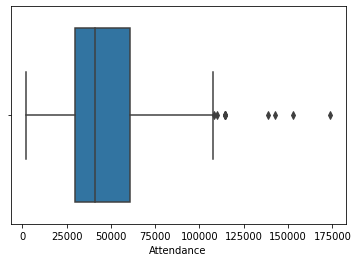

In [ ]:
sns.boxplot(data = Matches,
            x = 'Attendance')

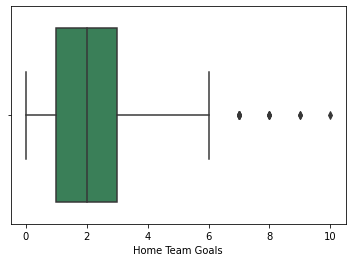

In [ ]:
sns.boxplot(data = Matches,
            x = 'Home Team Goals',
            color = 'seagreen')

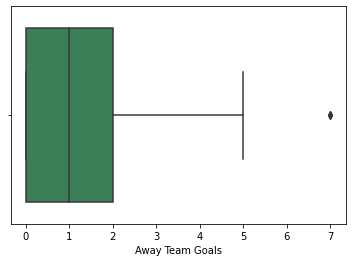

In [ ]:
sns.boxplot(data = Matches,
            x = 'Away Team Goals',
            color = 'seagreen')



## GOALS ANALYSIS

In [ ]:
Matches.head()

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,MatchID,Home Team Initials,Away Team Initials
0,1930.0,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,1096.0,FRA,MEX
1,1930.0,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,1090.0,USA,BEL
2,1930.0,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,1093.0,YUG,BRA
3,1930.0,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,1098.0,ROU,PER
4,1930.0,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,1085.0,ARG,FRA


In [ ]:
# Merge two columns Home And Away
dfwcm2 = Matches[['Year','Home Team Name','Home Team Goals','Away Team Name','Away Team Goals']]
# Test with Year = 1930
# dfwcm2 = dfwcm2[dfwcm2['Year'] == 1930]

home = dfwcm2[['Home Team Name','Home Team Goals']]
away = dfwcm2[['Away Team Name','Away Team Goals']]
away = away.rename(columns={"Away Team Name": "Team Name", "Away Team Goals": "Team Goals"})
home = home.rename(columns={"Home Team Name": "Team Name", "Home Team Goals": "Team Goals"})
frames =[home,away]
tmp = pd.concat(frames)

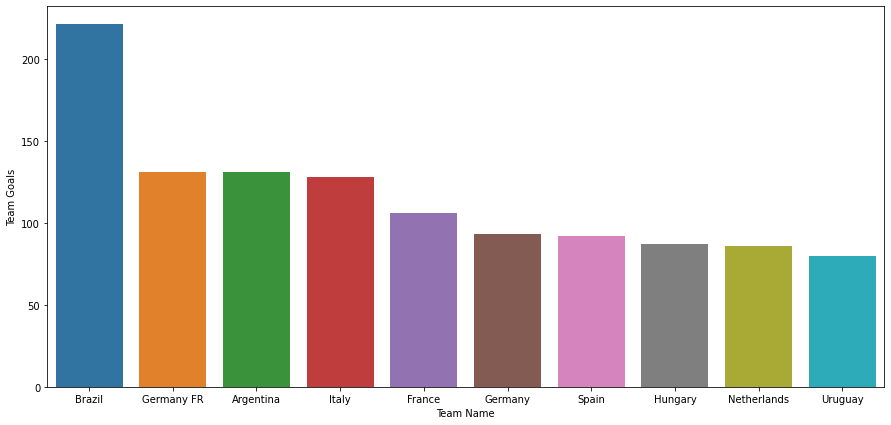

In [ ]:
plotdata = tmp.groupby('Team Name')['Team Goals'].sum().reset_index()
plotdata = plotdata.sort_values('Team Goals',ascending=False)
plotdata = plotdata[0:10]

plt.figure(figsize=(15,7))
sns.barplot(data=plotdata,y='Team Goals',x='Team Name')


Brazil là đội có nhiều bàn thắng nhất trong các kỳ World Cup

In [ ]:
#Tính Số Bàn Thua
# Merge two columns Home And Away
dfwcm3 = Matches[['Year','Home Team Name','Home Team Goals','Away Team Name','Away Team Goals']]
# Test with Year = 1930
# dfwcm2 = dfwcm2[dfwcm2['Year'] == 1930]

home = dfwcm3[['Home Team Name','Away Team Goals']]
away = dfwcm3[['Away Team Name','Home Team Goals']]

away = away.rename(columns={"Away Team Name": "Team Name", "Home Team Goals": "Team Goals Conceded"})
home = home.rename(columns={"Home Team Name": "Team Name", "Away Team Goals": "Team Goals Conceded"})
frames =[home,away]
tmp = pd.concat(frames)
tmp

#Dữ liệu này chưa ổn vì cần phải tính theo hiệu suất ghi bàn trung bình ở mỗi kỳ world cup và hiệu suất thủ thành ở mỗi kỳ world cup

,Team Name,Team Goals Conceded
0,France,1.0
1,USA,0.0
2,Yugoslavia,1.0
3,Romania,1.0
4,Argentina,0.0
...,...,...
831,Belgium,1.0
832,Mexico,2.0
833,Greece,1.0
834,Switzerland,1.0


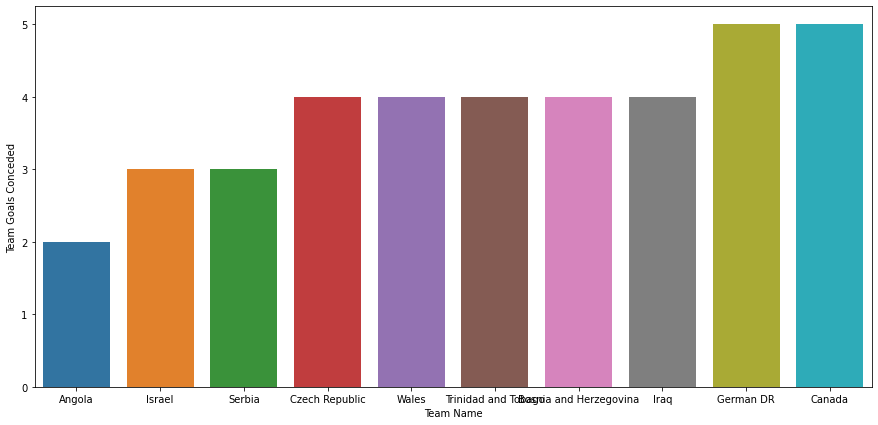

In [ ]:
plotdata = tmp.groupby('Team Name').sum().reset_index()
plotdata = plotdata.sort_values('Team Goals Conceded',ascending=True)
plotdata = plotdata[0:10]

plt.figure(figsize=(15,7))
sns.barplot(data=plotdata,y='Team Goals Conceded',x='Team Name')

So Sánh Với Kết Quả World Cup

In [ ]:
WorldCups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
plotdata = WorldCups.groupby('Winner')['Year'].count().reset_index()
plotdata = plotdata.rename(columns={'Year':'Numbers of Champion'})
plotdata = plotdata.sort_values('Numbers of Champion',ascending=False)

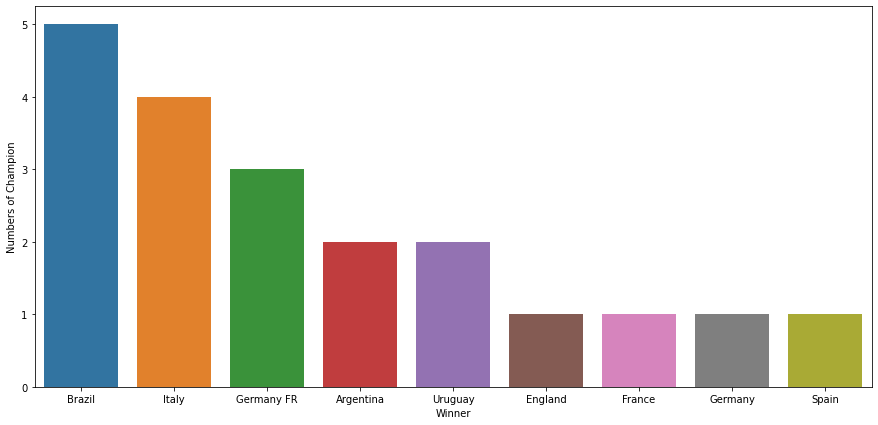

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=plotdata,x='Winner' , y='Numbers of Champion')

# check

In [ ]:
WorldCups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


In [ ]:
Matches['Stage'].unique()

array(['Group', 'Semi-finals', 'Final', 'Round of 16', 'Quarter-finals',
       'Third place'], dtype=object)

In [ ]:
m = pd.read_csv('WorldCupMatches.csv',encoding = 'utf-8')
m = m.iloc[0:852]
m['Year'] = m['Year'].astype(int)
m['Datetime'] = pd.to_datetime(m['Datetime'])

In [ ]:
m['Stage'].unique()

array(['Group', 'Semi-finals', 'Final', 'Round of 16', 'Quarter-finals',
       'Third place', 'Group Final', 'Second Group'], dtype=object)

In [ ]:
# WorldCups 1950: 13 in the Group round -> 4 team Final Group round. The Champions is the highest point team in the Final Group round
def fix_1950(x):
    if x in ['Group 1', 'Group 2', 'Group 3', 'Group 4']:
      return 'Group'
    else:
      return 'Group Final'
  
# WorldCups 1974-1978: First Group Round -> Second Group Round -> Final
def fix_7478(x):
    if x in ['Group 2', 'Group 1', 'Group 3', 'Group 4']:
      return 'Group'
    elif x in ['Group B', 'Group A']:
      return 'Second Group'
    elif x in['Match for third place']:
      return 'Third place'
    else:
      return x

def fix_all(x):
    if x in ['Group 1', 'Group 4', 'Group 2', 'Group 3','Group 6', 'Group B', 'Group A', 'Group 5', 'Group C', 'Group D', 'Group F', 'Group E', 'Group H', 'Group G']:
      return 'Group'
    elif x in ['Preliminary round','First round']:
      return 'Round of 16'
    elif x in ['Play-off for third place', 'Match for third place']:
      return 'Third place'
    else:
      return x

In [ ]:
m.loc[m['Year'] == 1950, 'Stage'] = m.loc[m['Year'] == 1950, 'Stage'].apply(fix_1950)
m.loc[((m['Year']  > 1973) & (m['Year'] < 1979)), 'Stage'] = m.loc[((m['Year'] > 1973) & (m['Year'] < 1979)), 'Stage'].apply(fix_7478)
m.loc[((m['Year'] != 1974) & (m['Year'] != 1978) & (m['Year'] != 1950)), 'Stage'] = m.loc[((m['Year'] != 1974) & (m['Year'] != 1978) & (m['Year'] != 1950)), 'Stage'].apply(fix_all)

In [ ]:
def fix_1982(x):
  if x['Datetime'] < '1982-06-26':
    return 'Group'
  elif x['Datetime'] > '1982-06-26':
    return 'Second Group'

In [ ]:
m.loc[m['Year'] == 1982, 'Stage'] = m[m['Year'] == 1982].apply(fix_1982, axis=1)

In [ ]:
m[m['Year'] == 1982]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
308,1982,1982-06-13 20:00:00,Group 3,Camp Nou,Barcelona,Argentina,0.00,1.00,Belgium,,95000.00,0.00,0.00,CHRISTOV Vojtech (TCH),PALOTAI Karoly (HUN),JARGUZ Alojzy (POL),293.00,749.00,ARG,BEL
309,1982,1982-06-14 17:15:00,Group 1,Estadio Municipal de Bala�dos,Vigo,Italy,0.00,0.00,Poland,,33000.00,0.00,0.00,VAUTROT Michel (FRA),PROKOP Adolf (GDR),RAINEA Nicolae (ROU),293.00,995.00,ITA,POL
310,1982,1982-06-14 21:00:00,Group 6,Ramon Sanchez Pizjuan,Seville,Brazil,2.00,1.00,Soviet Union,,68000.00,0.00,1.00,LAMO CASTILLO Augusto (ESP),SANCHEZ ARMINIO Victoriano (ESP),GARCIA CARRION Jose L. (ESP),293.00,791.00,BRA,URS
311,1982,1982-06-15 17:15:00,Group 1,Riazor,La Coru�A,Peru,0.00,0.00,Cameroon,,11000.00,0.00,0.00,WOEHRER Franz (AUT),RAINEA Nicolae (ROU),PROKOP Adolf (GDR),293.00,833.00,PER,CMR
312,1982,1982-06-15 21:00:00,Group 3,Nuevo Estadio,Elche,Hungary,10.00,1.00,El Salvador,,23000.00,3.00,0.00,AL DOY Ebrahim (BHR),CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293.00,896.00,HUN,SLV
313,1982,1982-06-15 21:00:00,Group 6,La Rosaleda,Malaga,Scotland,5.00,2.00,New Zealand,,36000.00,3.00,0.00,SOCHA David (USA),CHAN Thomson Tam Sun (HKG),EL GHOUL Yusef Mohamed (LBY),293.00,1051.00,SCO,NZL
314,1982,1982-06-16 17:15:00,Group 2,El Molinon,Gijon,Germany FR,1.00,2.00,Algeria,,42000.00,0.00,0.00,LABO REVOREDO Enrique (PER),ARISTIZABAL MURCIA Gilberto (COL),CASARIN Paolo (ITA),293.00,741.00,FRG,ALG
315,1982,1982-06-16 17:15:00,Group 4,San Mames,Bilbao,England,3.00,1.00,France,,44172.00,1.00,1.00,GARRIDO Antonio (POR),CASTRO Gaston (CHI),COELHO Arnaldo (BRA),293.00,878.00,ENG,FRA
316,1982,1982-06-16 21:00:00,Group 5,Luis Casanova,Valencia,Spain,1.00,1.00,Honduras,,49562.00,0.00,1.00,ITHURRALDE Arturo Andres (ARG),DOTCHEV Bogdan (BUL),BARRANCOS Luis (BOL),293.00,901.00,ESP,HON
317,1982,1982-06-17 17:15:00,Group 2,Carlos Tartiere,Oviedo,Chile,0.00,1.00,Austria,,22500.00,0.00,1.00,CARDELLINO DE SAN VICENTE Juan (URU),CASARIN Paolo (ITA),ARISTIZABAL MURCIA Gilberto (COL),293.00,764.00,CHI,AUT
